In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [78]:
# import our data into a pandas DataFrame
df4=pd.read_csv('cleaned_4yr.csv',index_col=0)

In [79]:
df4.head()

,id,name,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income
0,100654,Alabama A & M University,0.2749,4616,0.0877,9366.0,0.7039,0.7667,0.5769,0.0859,0.114,0.189,0.365828,49720.0
1,100663,University of Alabama at Birmingham,0.5309,12047,0.2578,8040.0,0.3525,0.5179,0.8161,0.2363,0.060,0.057,0.341224,55735.0
2,100690,Amridge University,0.2500,293,0.5392,7180.0,0.6971,0.8436,0.0909,0.8571,0.071,0.112,0.512500,53683.0
3,100706,University of Alabama in Huntsville,0.4867,6346,0.1746,9842.0,0.2949,0.4312,0.8255,0.2255,0.077,0.054,0.310132,58688.0
4,100724,Alabama State University,0.2165,4704,0.0727,9220.0,0.7815,0.8113,0.6262,0.0974,0.132,0.194,0.343434,46065.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


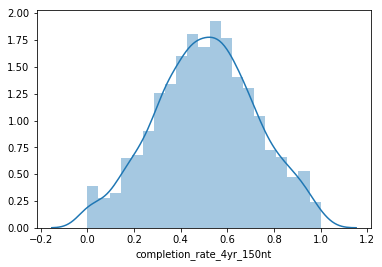

In [80]:
# take a look at our target variable distribution
sns.distplot(df4.iloc[:,2])

In [81]:
# apply min-max scaling to our features to get them all in the range of 0-1
df4['size']=df4['size'].apply(lambda x: (x - df4['size'].min())/df4['size'].max())
df4['cost']=df4['cost'].apply(lambda x: (x - df4['cost'].min())/df4['cost'].max())
df4['median_hh_income']=df4['median_hh_income'].apply(lambda x: (x - df4['median_hh_income'].min())/df4['median_hh_income'].max())

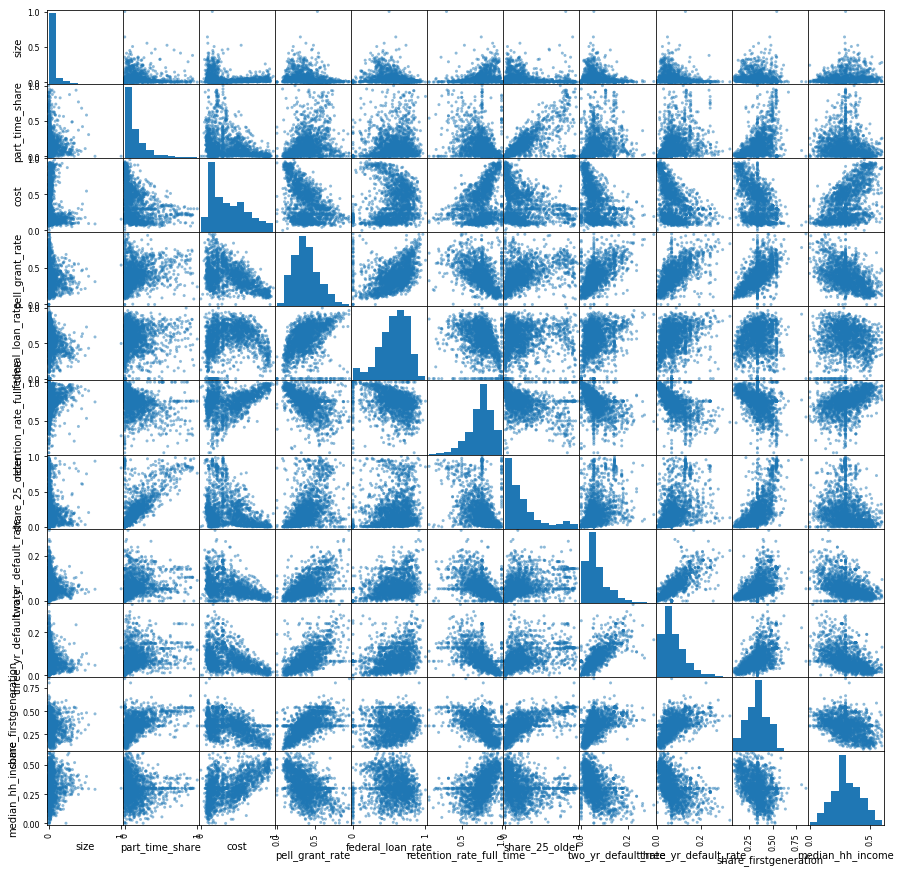

In [82]:
# visualize our feature distribution and collinearity
df4pred=df4.iloc[:,3:]
pd.plotting.scatter_matrix(df4pred, figsize=[15, 15])
plt.show()

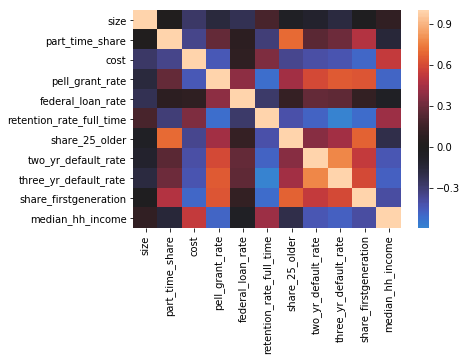

In [83]:
# create a correlation heatmap
sns.heatmap(df4pred.corr(), center=0)

In [84]:
# take a look at the actual correlation values, our highest is .78 which is below our cutoff of .9
df4pred.corr()

,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income
size,1.000000,0.024239,-0.262461,-0.160201,-0.223005,0.190053,-0.061886,-0.095712,-0.167330,-0.024459,0.101373
part_time_share,0.024239,1.000000,-0.343536,0.277468,0.080755,-0.305411,0.697222,0.245200,0.300900,0.484456,-0.147999
cost,-0.262461,-0.343536,1.000000,-0.438300,0.094838,0.346161,-0.348878,-0.401483,-0.420722,-0.494545,0.530921
pell_grant_rate,-0.160201,0.277468,-0.438300,1.000000,0.388541,-0.512491,0.436247,0.592995,0.651521,0.637745,-0.482935
federal_loan_rate,-0.223005,0.080755,0.094838,0.388541,1.000000,-0.277845,0.122193,0.278838,0.263725,0.113990,-0.061808
retention_rate_full_time,0.190053,-0.305411,0.346161,-0.512491,-0.277845,1.000000,-0.404504,-0.476535,-0.590574,-0.509119,0.422596
share_25_older,-0.061886,0.697222,-0.348878,0.436247,0.122193,-0.404504,1.000000,0.368663,0.440423,0.670789,-0.195240
two_yr_default_rate,-0.095712,0.245200,-0.401483,0.592995,0.278838,-0.476535,0.368663,1.000000,0.775961,0.528610,-0.432109
three_yr_default_rate,-0.167330,0.300900,-0.420722,0.651521,0.263725,-0.590574,0.440423,0.775961,1.000000,0.595539,-0.466570
share_firstgeneration,-0.024459,0.484456,-0.494545,0.637745,0.113990,-0.509119,0.670789,0.528610,0.595539,1.000000,-0.393942


In [85]:
# create a baseline multi-linear regression model to compare our final results against
Y=df4[['completion_rate_4yr_150nt']]
X=df4pred
regression=LinearRegression() 
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, Y, scoring="r2", cv=crossvalidation))
baseline

0.6736934676887855

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


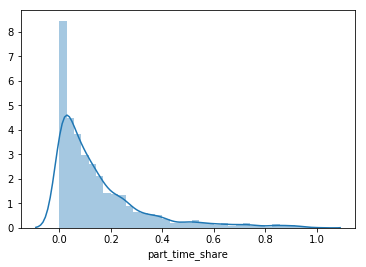

In [86]:
# look at some features that might have some interaction
sns.distplot(df4pred['part_time_share'])

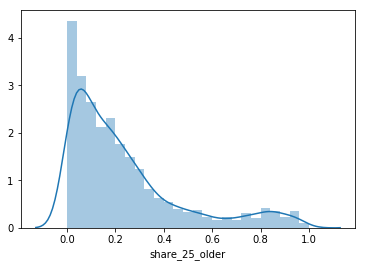

In [87]:
sns.distplot(df4pred['share_25_older'])

In [88]:
# there might be interaction between the percentage of part time students and the percentage of older students
# bin data into mostly full time, some part time, and many part time
pt_1 = df4[df4["part_time_share"]<.1]
pt_2 = df4[(df4["part_time_share"]>=.1) * (df4["part_time_share"]<.3)]
pt_3 = df4[df4["part_time_share"]>=.3]
pt_1.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,id,name,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income
0,100654,Alabama A & M University,0.2749,0.046135,0.0877,0.148921,0.7039,0.7667,0.5769,0.0859,0.114,0.189,0.365828,0.154470
4,100724,Alabama State University,0.2165,0.047015,0.0727,0.146269,0.7815,0.8113,0.6262,0.0974,0.132,0.194,0.343434,0.113963
5,100751,The University of Alabama,0.6871,0.316575,0.0819,0.168973,0.1938,0.4007,0.8627,0.0810,0.066,0.057,0.225713,0.245437
8,100858,Auburn University,0.7501,0.220906,0.0831,0.173078,0.1532,0.3280,0.9101,0.0427,0.045,0.037,0.172647,0.257373
9,100937,Birmingham Southern College,0.6821,0.012869,0.0054,0.604494,0.1888,0.4729,0.8209,0.0141,0.085,0.044,0.172494,0.321475


In [89]:
# create a regression for our bins
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

parttime_1 = pt_1["share_25_older"].values.reshape(-1, 1)
parttime_2 = pt_2["share_25_older"].values.reshape(-1, 1)
parttime_3 = pt_3["share_25_older"].values.reshape(-1, 1)

regression_1.fit(parttime_1, pt_1["completion_rate_4yr_150nt"])
regression_2.fit(parttime_2, pt_2["completion_rate_4yr_150nt"])
regression_3.fit(parttime_3, pt_3["completion_rate_4yr_150nt"])

# Make predictions using the testing set
pred_1 = regression_1.predict(parttime_1)
pred_2 = regression_2.predict(parttime_2)
pred_3 = regression_3.predict(parttime_3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[-0.54259896]
[-0.33380399]
[-0.31755048]


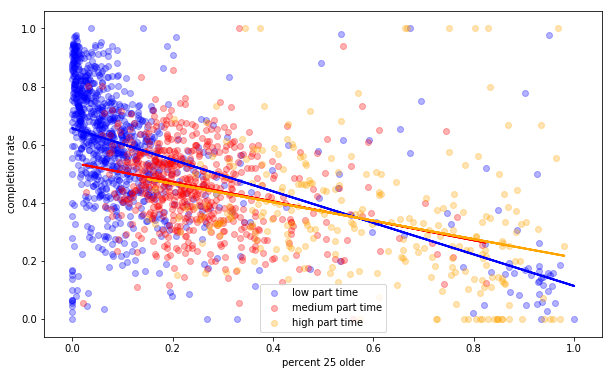

In [90]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(parttime_1, pt_1["completion_rate_4yr_150nt"],  color='blue', alpha = 0.3, label = "low part time")
plt.scatter(parttime_2, pt_2["completion_rate_4yr_150nt"],  color='red', alpha = 0.3, label = "medium part time")
plt.scatter(parttime_3, pt_3["completion_rate_4yr_150nt"],  color='orange', alpha = 0.3, label = "high part time")

plt.plot(parttime_1, pred_1,  color='blue', linewidth=2)
plt.plot(parttime_2, pred_2,  color='red', linewidth=2)
plt.plot(parttime_3, pred_3,  color='orange', linewidth=2)
plt.ylabel("completion rate")
plt.xlabel("percent 25 older")
plt.legend();

In [91]:
# look at effect of interaction
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact["part_25"] = X["part_time_share"] * X["share_25_older"]

interact_part_25 = np.mean(cross_val_score(regression, X_interact, Y, scoring="r2", cv=crossvalidation))
interact_part_25

0.6711511985553598

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


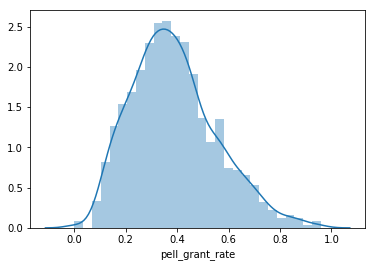

In [92]:
# look at interaction between the amount of pell grants given and the amount of loans defaulted on
sns.distplot(df4pred['pell_grant_rate'])

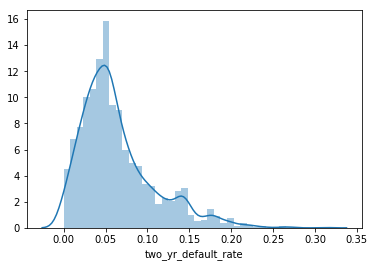

In [93]:
sns.distplot(df4pred['two_yr_default_rate'])

In [94]:
# bin into low rate of pell grants, medium rate, and high rate
pg_1 = df4[df4["pell_grant_rate"]<.3]
pg_2 = df4[(df4["pell_grant_rate"]>=.3) * (df4["pell_grant_rate"]<.5)]
pg_3 = df4[df4["pell_grant_rate"]>=.5]
pg_1.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,id,name,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income
3,100706,University of Alabama in Huntsville,0.4867,0.063433,0.1746,0.157567,0.2949,0.4312,0.8255,0.2255,0.077,0.054,0.310132,0.253860
5,100751,The University of Alabama,0.6871,0.316575,0.0819,0.168973,0.1938,0.4007,0.8627,0.0810,0.066,0.057,0.225713,0.245437
8,100858,Auburn University,0.7501,0.220906,0.0831,0.173078,0.1532,0.3280,0.9101,0.0427,0.045,0.037,0.172647,0.257373
9,100937,Birmingham Southern College,0.6821,0.012869,0.0054,0.604494,0.1888,0.4729,0.8209,0.0141,0.085,0.044,0.172494,0.321475
23,102049,Samford University,0.7257,0.033216,0.0361,0.512841,0.1199,0.3277,0.8874,0.0518,0.013,0.021,0.138055,0.374816


In [95]:
# create a regression for each bin
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

ty_1 = pg_1["two_yr_default_rate"].values.reshape(-1, 1)
ty_2 = pg_2["two_yr_default_rate"].values.reshape(-1, 1)
ty_3 = pg_3["two_yr_default_rate"].values.reshape(-1, 1)

regression_1.fit(ty_1, pg_1["completion_rate_4yr_150nt"])
regression_2.fit(ty_2, pg_2["completion_rate_4yr_150nt"])
regression_3.fit(ty_3, pg_3["completion_rate_4yr_150nt"])

# Make predictions using the testing set
pred_1 = regression_1.predict(ty_1)
pred_2 = regression_2.predict(ty_2)
pred_3 = regression_3.predict(ty_3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[-3.85322309]
[-2.08701839]
[-1.10166315]


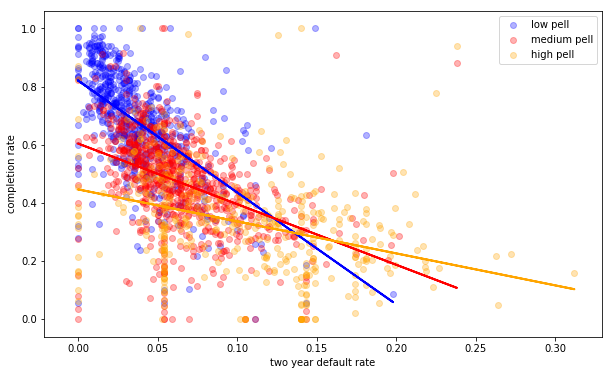

In [96]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(ty_1, pg_1["completion_rate_4yr_150nt"],  color='blue', alpha = 0.3, label = "low pell")
plt.scatter(ty_2, pg_2["completion_rate_4yr_150nt"],  color='red', alpha = 0.3, label = "medium pell")
plt.scatter(ty_3, pg_3["completion_rate_4yr_150nt"],  color='orange', alpha = 0.3, label = "high pell")

plt.plot(ty_1, pred_1,  color='blue', linewidth=2)
plt.plot(ty_2, pred_2,  color='red', linewidth=2)
plt.plot(ty_3, pred_3,  color='orange', linewidth=2)
plt.ylabel("completion rate")
plt.xlabel("two year default rate")
plt.legend();

In [97]:
# include interaction and new engineered feature of squared rates
X_interact2=X.copy()
X_interact2['pell_sq']=X['pell_grant_rate']**2
X_interact2['two_yr_sq']=X['two_yr_default_rate']**2

In [98]:
pell_2yr_sq = np.mean(cross_val_score(regression, X_interact2, Y, scoring="r2", cv=crossvalidation))
pell_2yr_sq

0.6908212690243783

In [99]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact3 = X_interact2.copy()
X_interact3["pell_2default"] = X_interact3["pell_grant_rate"] * X_interact3["two_yr_default_rate"]
interact_pell_2yr = np.mean(cross_val_score(regression, X_interact3, Y, scoring="r2", cv=crossvalidation))
interact_pell_2yr

0.6892266886846444

In [100]:
# look at interaction of cost of school and the median income for student families
cst_1 = df4[df4["cost"]<.3]
cst_2 = df4[(df4["cost"]>=.3) * (df4["cost"]<.5)]
cst_3 = df4[df4["cost"]>=.5]
cst_1.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,id,name,completion_rate_4yr_150nt,size,part_time_share,cost,pell_grant_rate,federal_loan_rate,retention_rate_full_time,share_25_older,two_yr_default_rate,three_yr_default_rate,share_firstgeneration,median_hh_income
0,100654,Alabama A & M University,0.2749,0.046135,0.0877,0.148921,0.7039,0.7667,0.5769,0.0859,0.114,0.189,0.365828,0.154470
1,100663,University of Alabama at Birmingham,0.5309,0.120437,0.2578,0.124837,0.3525,0.5179,0.8161,0.2363,0.060,0.057,0.341224,0.221132
2,100690,Amridge University,0.2500,0.002910,0.5392,0.109216,0.6971,0.8436,0.0909,0.8571,0.071,0.112,0.512500,0.198391
3,100706,University of Alabama in Huntsville,0.4867,0.063433,0.1746,0.157567,0.2949,0.4312,0.8255,0.2255,0.077,0.054,0.310132,0.253860
4,100724,Alabama State University,0.2165,0.047015,0.0727,0.146269,0.7815,0.8113,0.6262,0.0974,0.132,0.194,0.343434,0.113963


In [101]:
# create regression for each bin
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

inc_1 = cst_1["median_hh_income"].values.reshape(-1, 1)
inc_2 = cst_2["median_hh_income"].values.reshape(-1, 1)
inc_3 = cst_3["median_hh_income"].values.reshape(-1, 1)

regression_1.fit(inc_1, cst_1["completion_rate_4yr_150nt"])
regression_2.fit(inc_2, cst_2["completion_rate_4yr_150nt"])
regression_3.fit(inc_3, cst_3["completion_rate_4yr_150nt"])

# Make predictions using the testing set
pred_1 = regression_1.predict(inc_1)
pred_2 = regression_2.predict(inc_2)
pred_3 = regression_3.predict(inc_3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[0.68249685]
[0.29677016]
[0.79810265]


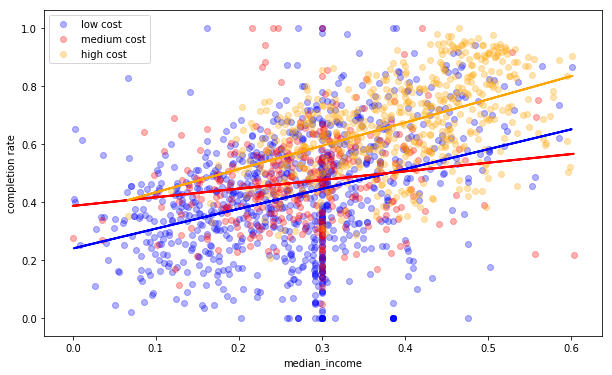

In [103]:
# plot output
plt.figure(figsize=(10,6))

plt.scatter(inc_1, cst_1["completion_rate_4yr_150nt"],  color='blue', alpha = 0.3, label = "low cost")
plt.scatter(inc_2, cst_2["completion_rate_4yr_150nt"],  color='red', alpha = 0.3, label = "medium cost")
plt.scatter(inc_3, cst_3["completion_rate_4yr_150nt"],  color='orange', alpha = 0.3, label = "high cost")

plt.plot(inc_1, pred_1,  color='blue', linewidth=2)
plt.plot(inc_2, pred_2,  color='red', linewidth=2)
plt.plot(inc_3, pred_3,  color='orange', linewidth=2)
plt.ylabel("completion rate")
plt.xlabel("median_income")
plt.legend();

In [104]:
# include these new engineered features and interactions into our dataset
df4['pt25']=df4['part_time_share']*df4['share_25_older']
df4['pell_twoyear']=df4['pell_grant_rate']*df4['two_yr_default_rate']
df4['incost']=df4['median_hh_income']*df4['cost']
df4['pellsq']=(df4['pell_grant_rate'])**2
df4['twoyrdsq']=(df4['two_yr_default_rate'])**2

In [105]:
# save the changes we made to a csv file
df4.to_csv('engineered_4yr.csv', encoding='utf-8', index=False)